# Skill Gap Analysis : Are Job Seekers Truly Industry-Ready?

In [2]:
# Import Data Manipulation LIbrarires
import pandas as pd 
import numpy as np 

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings('ignore')

# import logging
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode='w',
                    format='%(asctime)s -%(message)s - %(levelname)s',
                    force=True)

In [3]:
# Import a file using Pandas function
data = pd.read_csv("Skill gap analysis_ Responses.csv")
data.sample(frac=1)



,Full Name,Age,Current status,Degree/Program,Field / Domain of interest,Have you completed any internships or real-world projects?,How would you rate your technical skills,How would you rate your communication skills,How confident are you in attending interviews?,Do you feel your degree prepared you for jobs?,Have you attended any mock interviews or job preparation sessions?,Have you taken any certification courses or self-learning?,Do you think companies should test more on skills than degrees?,What is your biggest challenge in getting a job?,What would help you the most right now?,"Any suggestions for colleges, training institutes, or job platforms to help improve student and job-seeker readiness?"
35,NaN,26 - 35,Working professional (2 + years of experience),BE,Data Science / Analytics,Yes,5,5,5,Yes,Yes,Yes,Yes,NaN,Technical training,NaN
18,Sanjana,18 - 25,Final year student,BCA,Data Science / Analytics,Yes,4,4,4,Partially,Yes,Yes,Yes,Weak resume,Resume/interview preparation,NaN
0,Archana kadam,18 - 25,Looking for a job (fresher),Mba in IT and Business research and Analysis,Data Science / Analytics,Yes,4,4,5,Yes,Yes,Yes,"Yes, No",Poor communication/confidence,Technical training,No
16,Vaishnavi Nalawade,18 - 25,Final year student,B.Sc,Data Science / Analytics,No,2,3,3,Partially,No,Yes,Yes,"Lack of technical skills, Fear of interviews, ...","Technical training, Resume/interview preparati...",NaN
20,NaN,18 - 25,Working professional (less than 2 years of exp...,Btech,Technical sales,No,3,4,4,Partially,No,Yes,Yes,Lack of experience,Mentorship/guidance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,Surya,18 - 25,Final year student,BE,IT/ Software,Yes,4,4,3,Partially,Yes,Yes,Yes,Fear of interviews,Resume/interview preparation,NaN
30,Asma Khan,18 - 25,Recently graduated,BSc IT,Data Science / Analytics,No,3,3,3,Partially,No,Yes,Yes,Lack of experience,"Technical training, Internship/project experie...",Focus on solving real-life problems and enhanc...
71,Farah Rafeeque,18 - 25,"Recently graduated, Looking for a job (fresher)",BCA,Data Science / Analytics,Yes,3,4,4,Partially,Yes,Yes,Yes,Lack of technical skills,Technical training,Give training on personality development and s...
2,Anil Varma,26 - 35,Working professional (less than 2 years of exp...,B.A.,"IT/ Software, Data Science / Analytics",No,4,4,4,Yes,No,Yes,Yes,Lack of experience,"Technical training, Communication/soft skills,...",NaN


In [4]:
data.shape

(81, 16)

In [5]:
# Checking Information of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 16 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                     --------------  ----- 
 0   Full Name                                                                                                                  76 non-null     object
 1   Age                                                                                                                        81 non-null     object
 2   Current status                                                                                                             81 non-null     object
 3   Degree/Program                                                                                                             81 non-null   

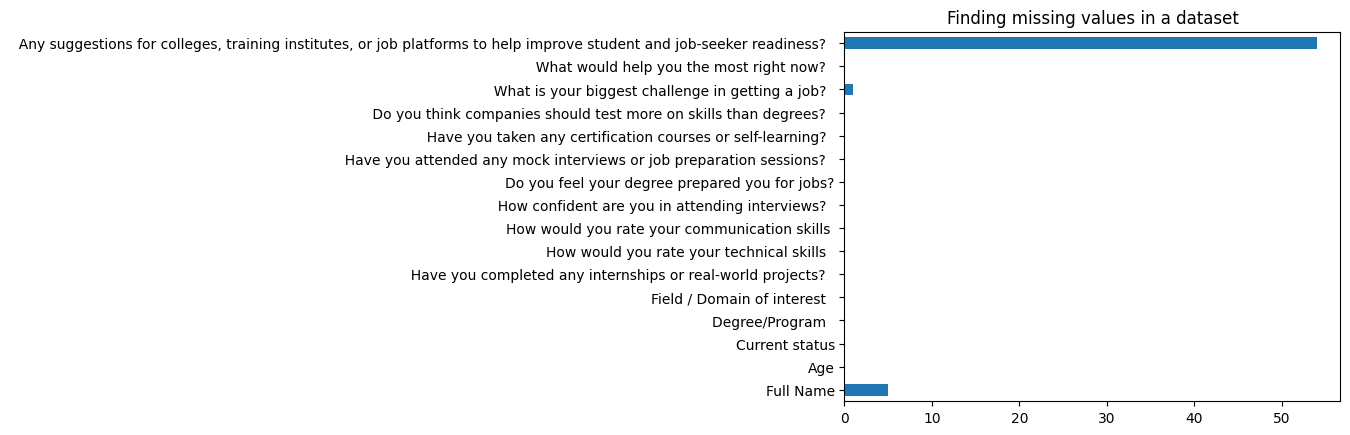

In [6]:
# Finding missing values in a Dataset
data.isnull().sum().plot(kind='barh')
plt.title('Finding missing values in a dataset')
plt.show()

In [7]:
missing_data = data.isnull().sum()/len (data)*100
pd.set_option('display.max_columns', True)
missing_data.sort_values(ascending=False)
missing_data[missing_data>0].sort_values(ascending=False)


  Any suggestions for colleges, training institutes, or job platforms to help improve student and job-seeker readiness?      66.666667
Full Name                                                                                                                     6.172840
  What is your biggest challenge in getting a job?                                                                            1.234568
dtype: float64

In [8]:
# Drop the column having missing values more than 15%
data = data.drop(columns=missing_data[missing_data > 15].index)


In [9]:
# Segregating the columns
Numerical_col = data.select_dtypes(exclude='object')
Categorical_col = data.select_dtypes(include='object')

In [10]:
Numerical_col.shape

(81, 3)

In [11]:
print(Numerical_col.columns.tolist())

['How would you rate your technical skills  ', 'How would you rate your communication skills ', '  How confident are you in attending interviews?  ']


In [12]:
Categorical_col.shape

(81, 12)

In [13]:
print(Categorical_col.columns.tolist())

['Full Name', 'Age', 'Current status', 'Degree/Program  ', 'Field / Domain of interest  ', '  Have you completed any internships or real-world projects?  ', 'Do you feel your degree prepared you for jobs?', '  Have you attended any mock interviews or job preparation sessions?  ', '  Have you taken any certification courses or self-learning?  ', ' Do you think companies should test more on skills than degrees?  ', '  What is your biggest challenge in getting a job?  ', '  What would help you the most right now?  ']


In [14]:
# Simple Imputer
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')
for i in Categorical_col.columns:
    data[i] = si.fit_transform(data[[i]]).ravel()


# Data Manipulation


In [15]:
print(data.columns.tolist())

['Full Name', 'Age', 'Current status', 'Degree/Program  ', 'Field / Domain of interest  ', '  Have you completed any internships or real-world projects?  ', 'How would you rate your technical skills  ', 'How would you rate your communication skills ', '  How confident are you in attending interviews?  ', 'Do you feel your degree prepared you for jobs?', '  Have you attended any mock interviews or job preparation sessions?  ', '  Have you taken any certification courses or self-learning?  ', ' Do you think companies should test more on skills than degrees?  ', '  What is your biggest challenge in getting a job?  ', '  What would help you the most right now?  ']


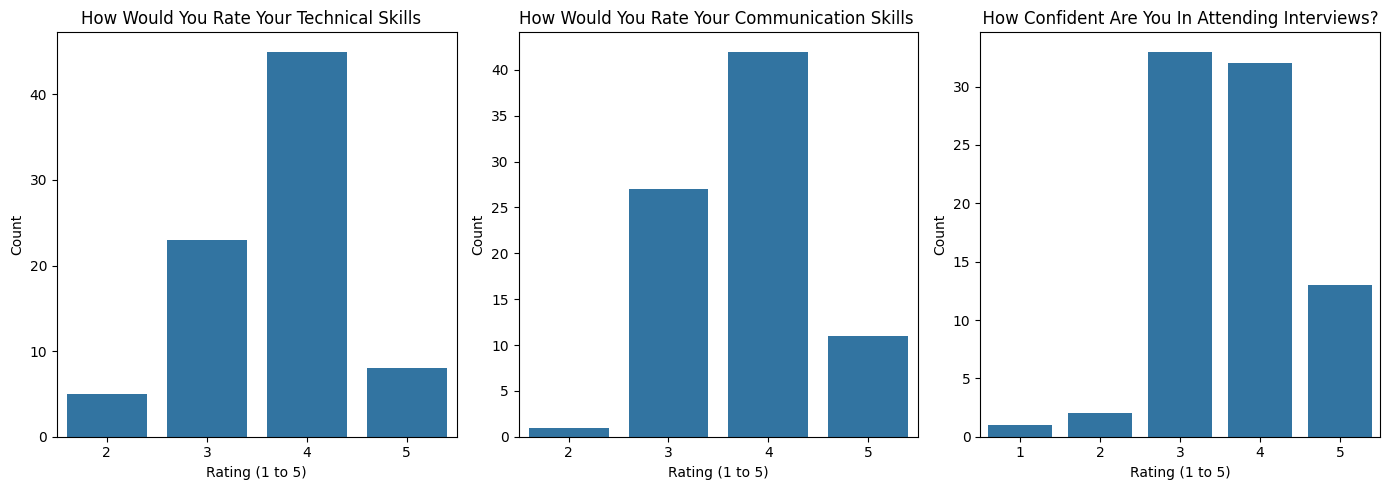

In [16]:
# Skill Rating Distrubution by Count Plot
plt.figure(figsize=(14, 5))
skills = ['How would you rate your technical skills  ', 'How would you rate your communication skills ', '  How confident are you in attending interviews?  ']

for i, skill in enumerate(skills, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=skill)
    plt.title(f'{skill.replace("_", " ").title()}')
    plt.xlabel('Rating (1 to 5)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

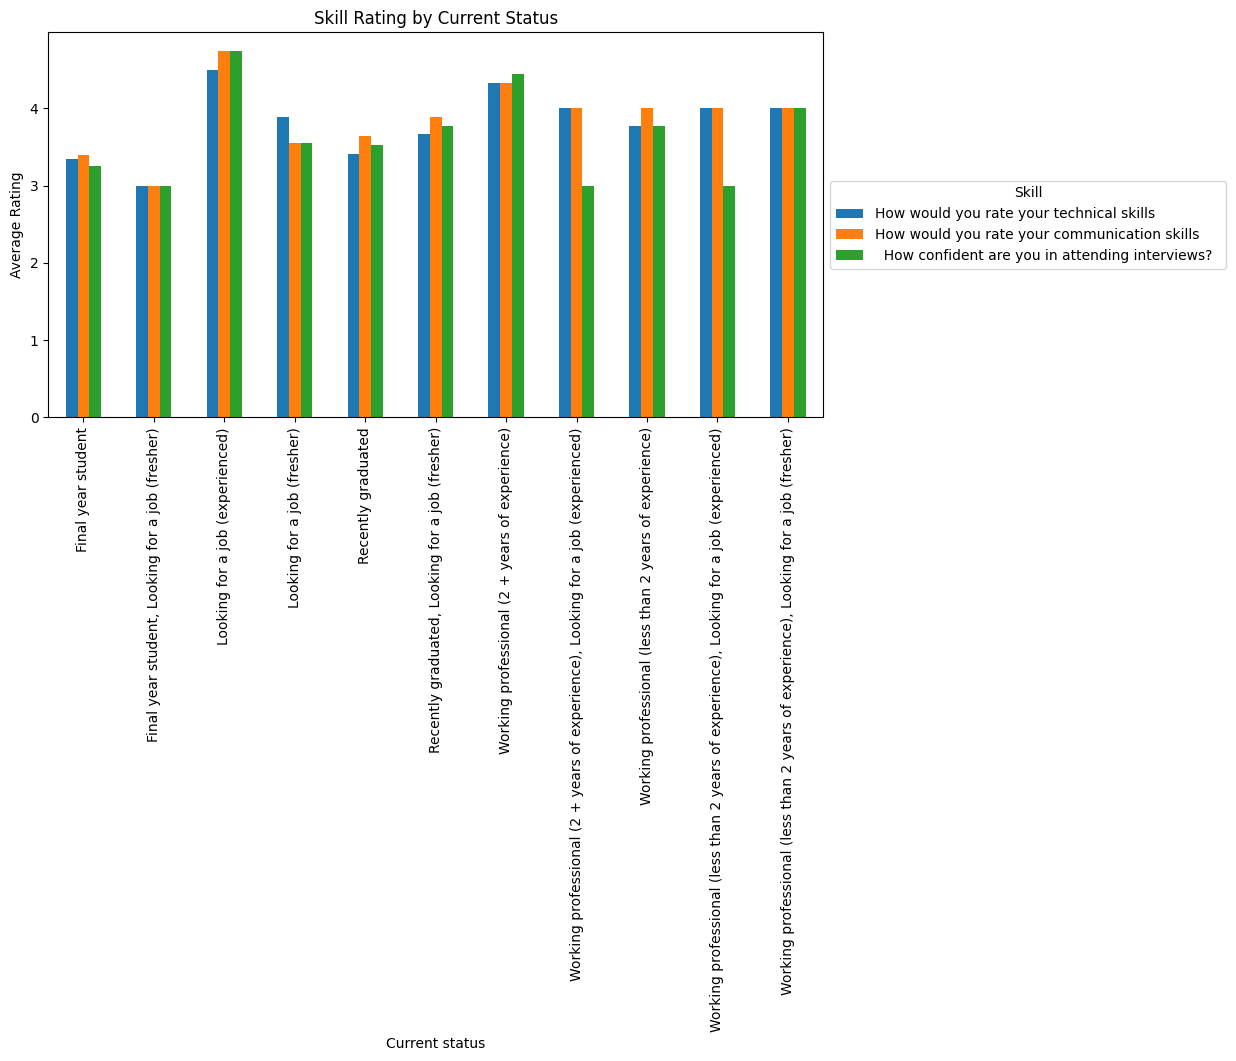

In [17]:
# Average Rating Comparision
skill_col = ['How would you rate your technical skills  ', 'How would you rate your communication skills ', '  How confident are you in attending interviews?  ']

# Group by Current Status
status_skill_avg = data.groupby('Current status')[skill_col].mean()

# Bar plot
status_skill_avg.plot(kind='bar',figsize=(10,5))
plt.title('Skill Rating by Current Status')
plt.ylabel('Average Rating')
plt.xlabel('Current status')
plt.legend(title = 'Skill', loc='center left',bbox_to_anchor=(1.0, 0.5) )
plt.tight_layout()
plt.show()


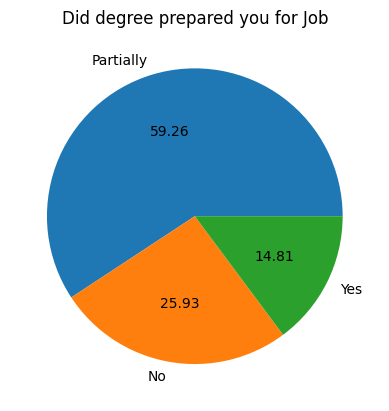

In [18]:
# Did degree prepared you for job
degree_prep_count = data['Do you feel your degree prepared you for jobs?'].value_counts()

# Pie Chart
plt.Figure(figsize=(6,6))
plt.pie(degree_prep_count,labels=degree_prep_count.index,autopct='%1.2f')
plt.title('Did degree prepared you for Job')
plt.show()

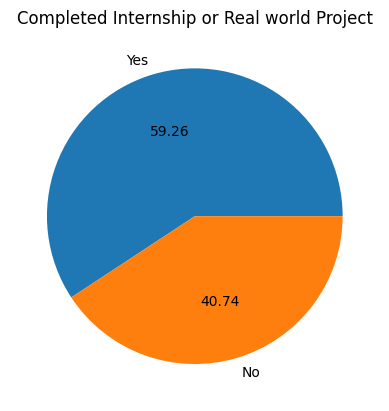

In [19]:
# Completed Internship or Real world Project 
intern_complete_count = data['  Have you completed any internships or real-world projects?  '].value_counts()

# pie chart
plt.pie(intern_complete_count, labels= intern_complete_count.index,autopct='%1.2f')
plt.title('Completed Internship or Real world Project')
plt.show()

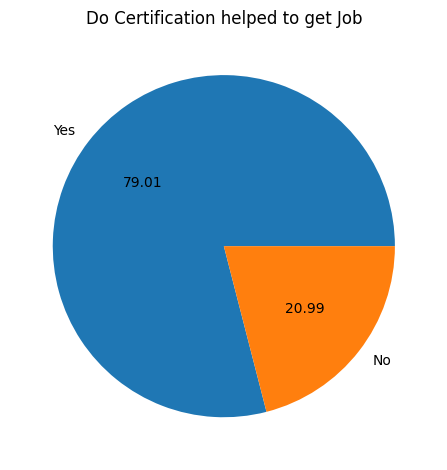

In [20]:
# Do Certification helped to get Job
certificate_count = data ['  Have you taken any certification courses or self-learning?  '].value_counts()

# Pie plot
plt.pie(certificate_count, labels= certificate_count.index,autopct='%1.2f')
plt.title('Do Certification helped to get Job')
plt.tight_layout()
plt.show()

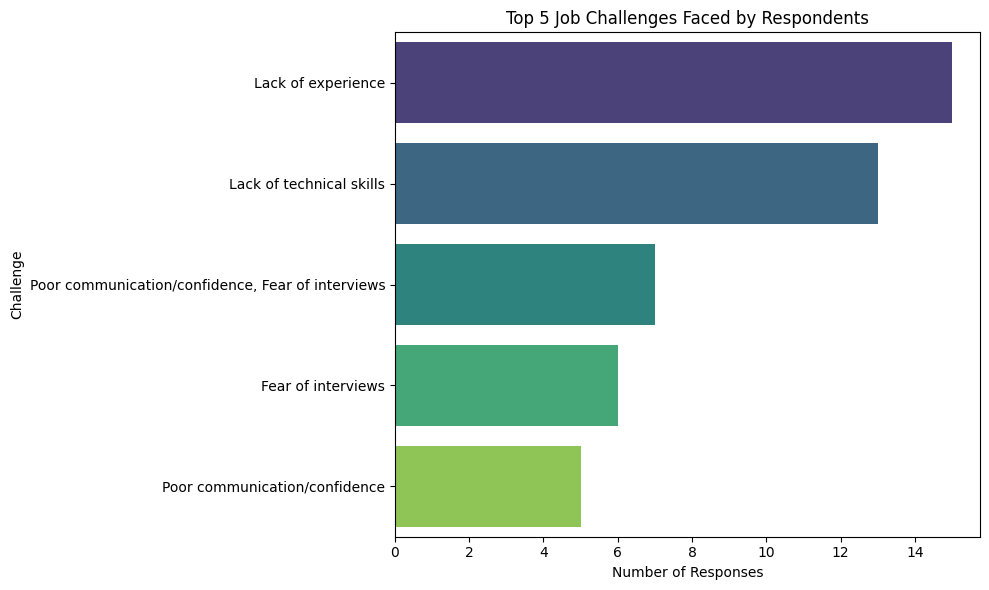

In [25]:
# Top Job Challenges Faced by Respondents
plt.figure(figsize=(10, 6))
top_5_challenges = data['  What is your biggest challenge in getting a job?  '].value_counts().nlargest(5).index
sns.countplot(
    data=data,
    y='  What is your biggest challenge in getting a job?  ', 
     order=top_5_challenges,
    palette='viridis'
)
plt.title('Top 5 Job Challenges Faced by Respondents')
plt.xlabel('Number of Responses')
plt.ylabel('Challenge')
plt.tight_layout()
plt.show()


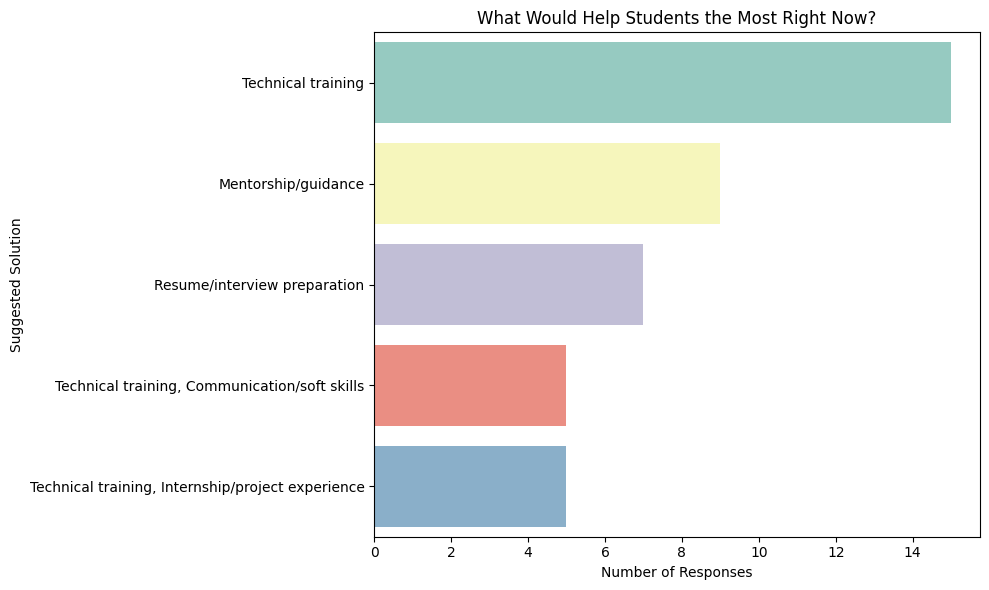

In [26]:
# What Would Help the Most Right Now?
plt.figure(figsize=(10, 6))
top_5_solutions = data['  What would help you the most right now?  '].value_counts().nlargest(5).index
sns.countplot(
    data=data,
    y= '  What would help you the most right now?  ', 
       order=top_5_solutions,
    palette='Set3'
)
plt.title('What Would Help Students the Most Right Now?')
plt.xlabel('Number of Responses')
plt.ylabel('Suggested Solution')
plt.tight_layout()
plt.show()


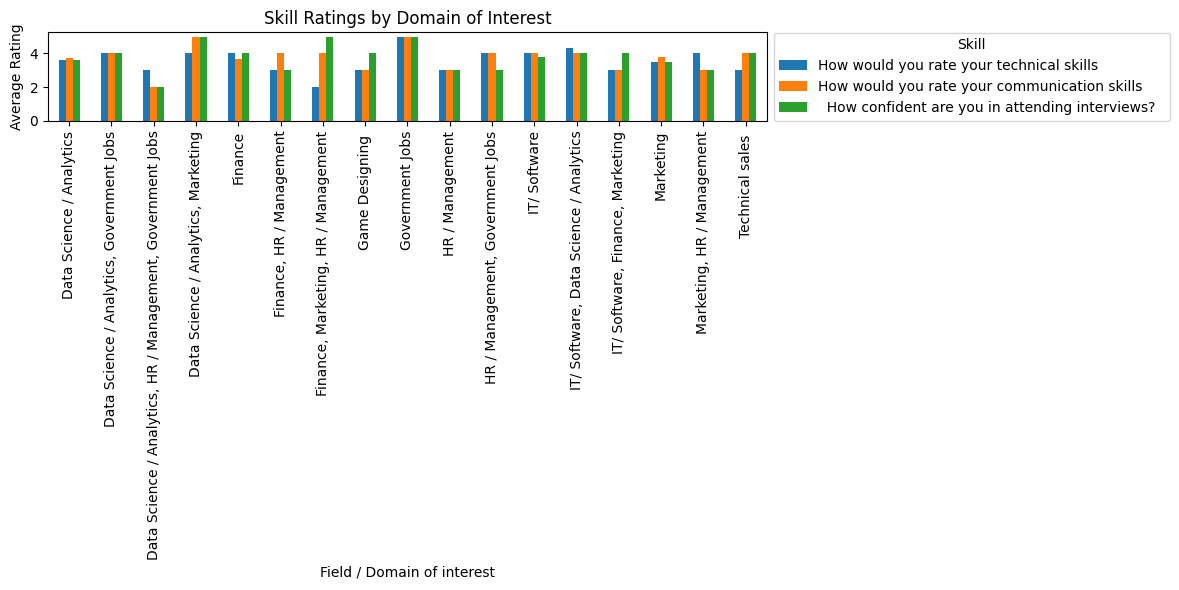

In [23]:
# Average Skill Ratings by Domain of Interest
domain_skill_avg = data.groupby('Field / Domain of interest  ')[[
    'How would you rate your technical skills  ',
    'How would you rate your communication skills ',
    '  How confident are you in attending interviews?  '
]].mean()

# Plot the bar chart
ax = domain_skill_avg.plot(kind='bar', figsize=(14, 6))

plt.title('Skill Ratings by Domain of Interest')
plt.ylabel('Average Rating')
plt.xlabel('Field / Domain of interest')
plt.legend(title='Skill',loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
